<a href="https://colab.research.google.com/github/MrCherveN/DataAnalist-7-0_HomeTasks/blob/main/%D0%A2%D0%B2%D0%BE%D1%80%D1%87%D0%B5_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Творче аналітичне завдання

## Завдання

Уявіть себе аналітиком компанії Yulu, з даними якої ми вже багато працювали.

Ваша задача - провести 3 самостійних аналізи на даних Yulu, кожен з яких має використовувати одну (або кілька) з освоєних нами візуалізацій і супроводжуватись висновками з побудованої вами візуалізації. 1 аналіз - це відповідь на поставлене Вами питання до даних.

Аналіз може включати або ні трансформацію даних (групування, або створення нових колонок) - це на Ваш вибір.

Тож, Вам треба задати 3 питання до даних і скористуватись при відповіді на них візуалізацією :) Питання можуть бути як прості (яка різниця між середніми показниками вологості по сезонам - побудуємо стовпачасті діаграми аби це дослідити), так і складніші - оцінюватись це буде однаково, головне, аби питання мало аналітичний сенс.

Ви можете використовувати той інструмент візуалізації, який Вам сподобався найбільше.

Після того, як завершите свій аналіз, запишіть коротке відео до 3 хв, в якому розкажіть, що ви проаналізували і які дії рекомендуєте зробити виходячи з Вашого аналізу. Включіть при записі демонстрацію екрану. Це вправа на пояснення своїх аналітичних висновків простою мовою. Уявіть, що Ви зробили аналіз і аби не збирати 100 людей на один мітинг, Ви записуєте відео з поясненням, аби донести усім ключові думки. По завершенню, здайте посилання на Ваше відео, ми будемо переглядати кожне відео і давайти фідбек в пакетах з фідбеком :) Здавати треба саме посилання на відео. Для запису відео рекомендую скористатись сервісом Loom, він безкоштовний і дуже простий: https://www.loom.com/

Рекомендую на аналітичну частину витратити не більше 1 години. Не заморочуйтесь прям дуже сильно, суть в тому, аби потренуватись робити аналіз, будувати візуалізації і презентувати свою роботу. У нас ще багато роботи попереду, тож 20 годин на це завдання буде витрачати не зовсім доречно :)

Для здачі цього завдання:

Завантажте ноутбук у свій репозиторій на GitHub і поділіться посиланням на нього з виконаним домашнім завданням. Можна також надати посилання на Google Colab, якщо Ви працювали в ньому.

Додайте посилання на ваше відео в Looom до 3х хвилин з презентацією результатів.

Напишіть, скільки приблизно часу у Вас пішло на виконання цього ДЗ?

Поділіться, що нового Ви навчились під час виконання цього домашнього завдання?



## Профіль колонок набору даних:




- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


## Підключення необхідних бібліотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Завантаження даних

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python/Аналітик 7-0/Лекции/Модуль 4/data/yulu_rental.csv')

## Питання №1


Побудувати графік порівняння середньої кількість орендованих велосипедів в розрізі значенням season. Яке значення season домінує, а яке є аутсайдером по оренді? Висловіть думку, з чим це може бути пов'язано. Які рекомендації можна надати бізнесу?

In [4]:
df['season_label'] = df['season'].replace({
    1: 'весна',
    2: 'літо',
    3: 'осінь',
    4: 'зима'
})

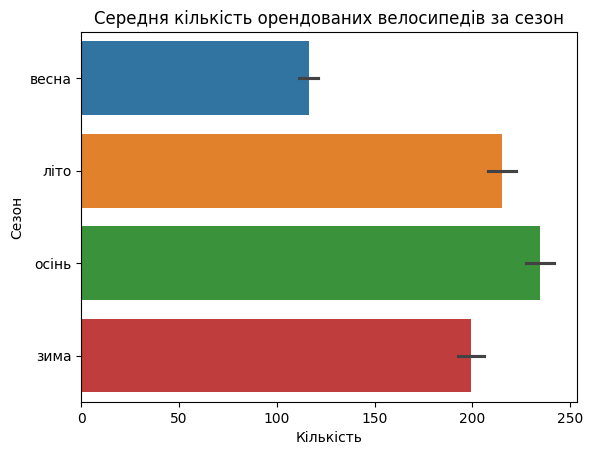

In [5]:
sns.barplot(y='season_label', x='count', data=df, estimator='mean',  hue='season_label', legend=False)
plt.xlabel('Кількість')
plt.ylabel('Сезон')
plt.title('Середня кількість орендованих велосипедів за сезон')
plt.show();

In [6]:
# перевірка
df.groupby('season_label')['count'].mean()

,count
season_label,
весна,116.343261
зима,198.988296
літо,215.251372
осінь,234.417124


In [7]:
# перевірка
df.groupby('season')['count'].mean()

,count
season,
1,116.343261
2,215.251372
3,234.417124
4,198.988296


Побудуємо додатково цей же графік, але по суммі всіх оренд в розрізі сезонів.

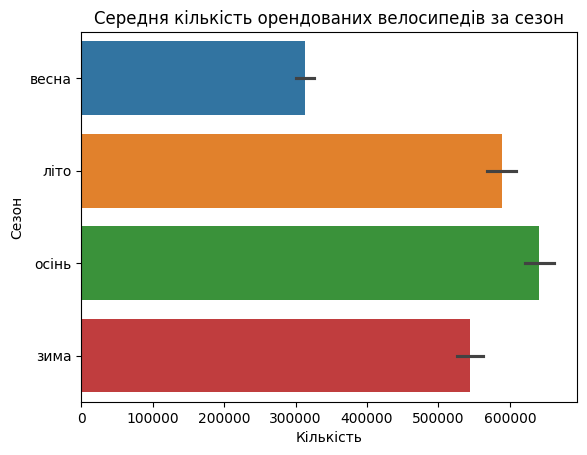

In [8]:
sns.barplot(y='season_label', x='count', data=df, estimator='sum',  hue='season_label', legend=False)
plt.xlabel('Кількість')
plt.ylabel('Сезон')
plt.title('Середня кількість орендованих велосипедів за сезон')
plt.show();

**Висновки:**

З графіку видно, що домінуючу позицію по середній кількості орендованих велосипедів за сезон займає осінь. Друге місце посідає літо. Найменше середнє значення відповідає весні.
Можливою причиною такого розподілу явлються відповідні погодні умови, які впливають на привабливість користування вилосипедом. Також збільшення використання велосипедів може бути пов'язано з відпустками та/або сезонними роботами.

 Бізнесу слід:
 1. розробити певні програми лояльності, сезонні знижки (особливо для сезонів з низьким попитом);
 2. для сезонів з високим попитом розглянути варінти збільшення велопарку.

 Це допоможе адаптуватися бізнесу до сезонних коливань попиту та збільшити його в майбутньому.


## Питання №2

Продовжимо аналіз залежності сезонів в розрізі середньої кількості орендованих велосипедів з попереднього завдання, доповнивши додатковими умовами.

 Чи є якась залежність між сезоном (season), погодою (weather) та середньою кількістю орендованих велосипедів (count)? Які з цього можна зробити висновки? Які рекомендації можна дати бізнесу на основі зроблених висновків?

 Побудуйте теплову мапу кореляції weather та count. Поясніть, що ви бачите?

In [9]:

df_filtered = df.groupby(['season_label', 'weather'])['count'].mean().unstack()
df_filtered


weather,1,2,3,4
season_label,,,,
весна,126.781694,106.861538,61.227488,164.0
зима,209.511163,194.784387,134.466667,NaN
літо,236.729595,189.515537,123.906250,NaN
осінь,243.583420,230.771523,156.582915,NaN


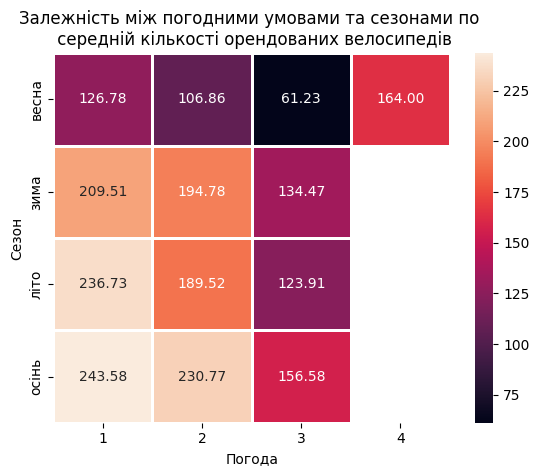

In [10]:
sns.heatmap(df_filtered, annot=True, linewidth=.8, fmt=".2f", cmap="rocket")

plt.title('Залежність між погодними умовами та сезонами по \n середній кількості орендованих велосипедів')
plt.xlabel('Погода')
plt.ylabel('Сезон')

plt.show()

Як вже ми раніше було вказано в питанні №1, фаворитом по кількості орендованих велосипедів є осінь, а аутсайдером - весна. Найбільші значення оренди по видам погоди припадаються на значення №1, що є логічним. Адже краща погода є гарним стимулом до користування велосипедом. Цікава ситуація з типом погоди №4 (найгірші погодні умови) весною, адже воно має найбільше середнє значення серед інших видів погоди цієї пори року. Вірогідно, це пов'язано з тим, що весною в основному буває погано погода.

Рекомендації бізнесу: при розробці спеціальних програм та акцій врахувати тип погоди для подальшого стимулювання попиту.

Побудуємо тепловий графік кореляції по weather:

In [11]:
df_pivot = df.pivot(columns='weather', values='count').fillna(0)
df_pivot.head(3)


weather,1,2,3,4
0,16.0,0.0,0.0,0.0
1,40.0,0.0,0.0,0.0
2,32.0,0.0,0.0,0.0


In [12]:
df_pivot.corr()

weather,1,2,3,4
weather,,,,
1,1.000000,-0.299801,-0.139348,-0.007178
2,-0.299801,1.000000,-0.074486,-0.003837
3,-0.139348,-0.074486,1.000000,-0.001783
4,-0.007178,-0.003837,-0.001783,1.000000


In [13]:
matrix = np.triu(df_pivot.corr())
matrix

array([[ 1.        , -0.29980117, -0.13934805, -0.00717819],
       [ 0.        ,  1.        , -0.07448631, -0.00383699],
       [ 0.        ,  0.        ,  1.        , -0.00178344],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

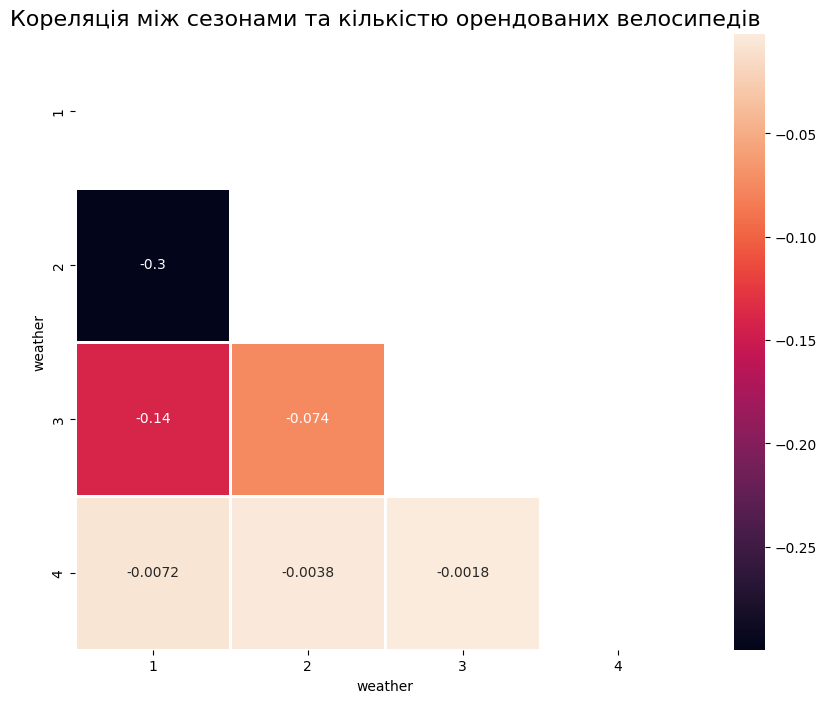

In [14]:
plt.figure(figsize=(10, 8))

sns.heatmap(df_pivot.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket")
plt.title('Кореляція між сезонами та кількістю орендованих велосипедів', fontsize=16)

plt.show();

Графік показує, що кориляція між значеннями weather фактично відсутня.

## Питання №3

В продовження попередніх питань розглянемо вплив години на активність оренди велосипедів в продовж кожного з сезонів. Побудувати графік та знайти вплив.
Які можна зробити висновки та рекомендації?

In [15]:
df['datetime'] = pd.to_datetime(df.datetime)
df['hour'] = df.datetime.dt.hour
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_label,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,весна,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,весна,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,весна,2


In [16]:
season_hourly_count = df.groupby(['season_label', 'hour'])['count'].sum().unstack()

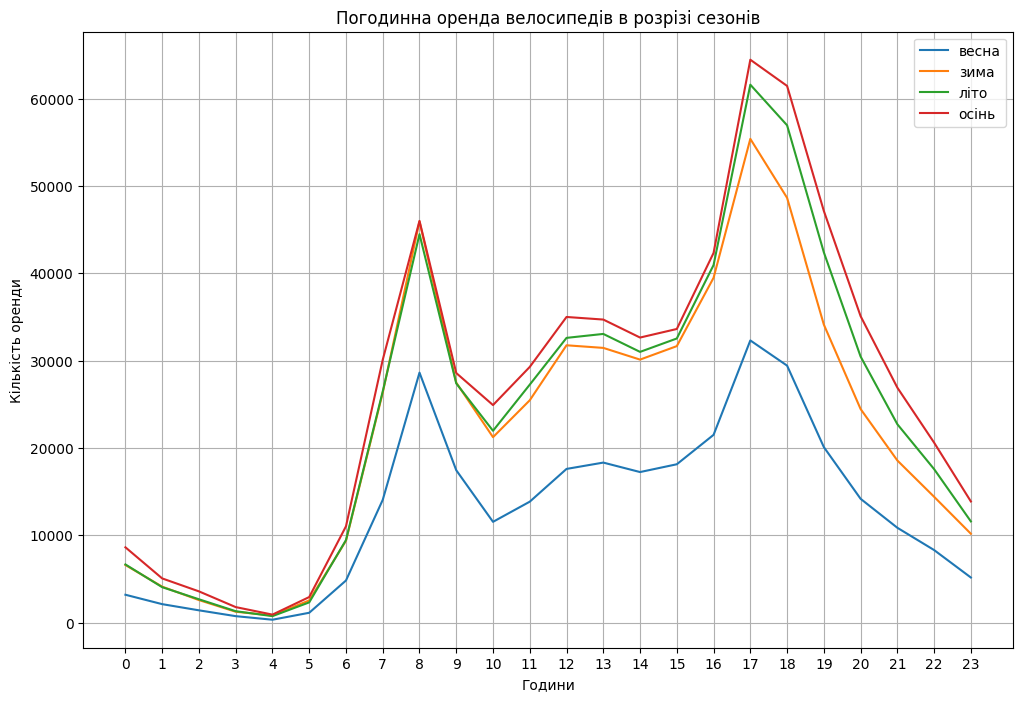

In [17]:
plt.figure(figsize=(12, 8))

for season in season_hourly_count.index:
    plt.plot(season_hourly_count.columns, season_hourly_count.loc[season], label=season)

plt.title('Погодинна оренда велосипедів в розрізі сезонів')
plt.xlabel('Години')
plt.xticks(range(0, 24))
plt.ylabel('Кількість оренди')
plt.legend()
plt.grid()
plt.show()

З графіку видно, що пікове користування сервісом відбувається о 8 та 17 годинах. Що можна пояснити тим, що в цей час люди їдуть на роботу та повретаються з неї. Такж ми бачимо, що попит починає спадати після 18 години, а зростати починає з 4 ранку.

Можливо бізнесу варто врахувати в своїй стратегії та нових акціях/програмах збільшення мотивації користування сервісом в інші "непопулярні" години.